# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [ ]:
!pip install --upgrade geopandas

!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 15.3MB 279kB/s 
     |████████████████████████████████| 6.5MB 40.2MB/s 
     |████████████████████████████████| 225kB 5.1MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=1642dcb6d3e79dd27c06a3592eca58334bde8cf61d93f9f8cded392ebc654a22
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,352 kB/s)
Selecting previously unselected

In [6]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [8]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [10]:
# Read shapefile
ph = gpd.read_file('DSDATA/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [11]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

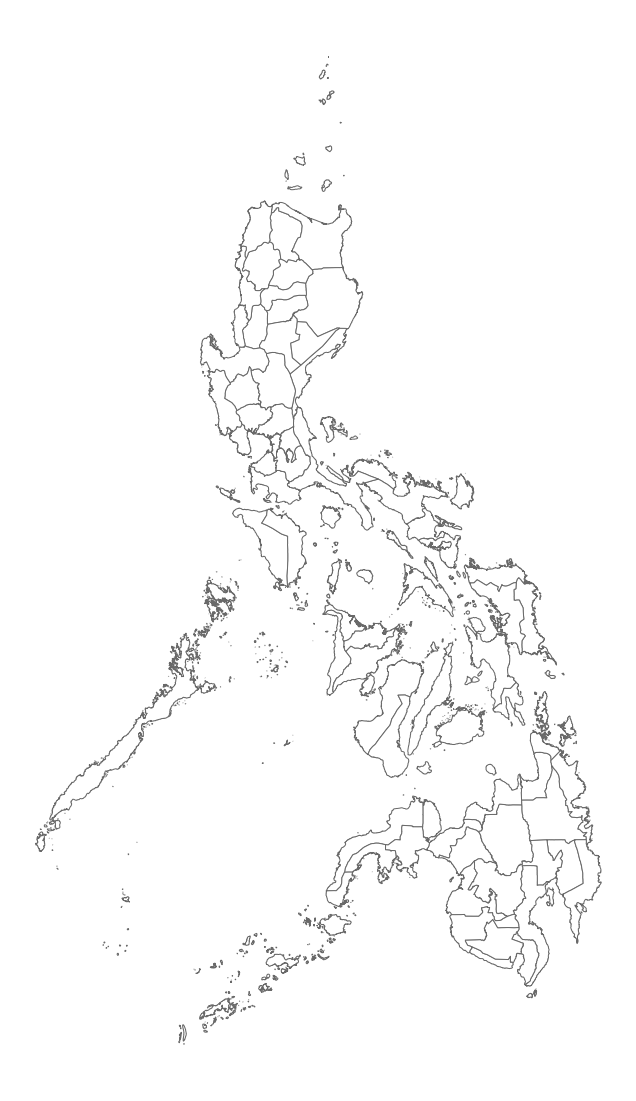

In [12]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [14]:
# Read GeoJSON file
healthsites = gpd.read_file('DSDATA/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [15]:
# Read in the data using pandas

citibike = pd.read_csv(os.getenv('DSDATA') + '/202102-citibike-tripdata.csv')
citibike.head()

TypeError: ignored

In [ ]:
citibike.shape

(634631, 15)

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [ ]:
stations = citibike[['end station longitude', 'end station latitude']]

In [ ]:
stations.drop_duplicates(inplace=True)
stations.shape

/Users/brianesamson/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(1283, 2)

In [ ]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]

# Set the crs
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

/Users/brianesamson/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,end station longitude,end station latitude,geometry
0,-73.990050,40.772370,POINT (-73.99005 40.77237)
1,-73.958408,40.768762,POINT (-73.95841 40.76876)
2,-73.976687,40.722281,POINT (-73.97669 40.72228)
3,-73.955959,40.781411,POINT (-73.95596 40.78141)
4,-73.974498,40.743227,POINT (-73.97450 40.74323)


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

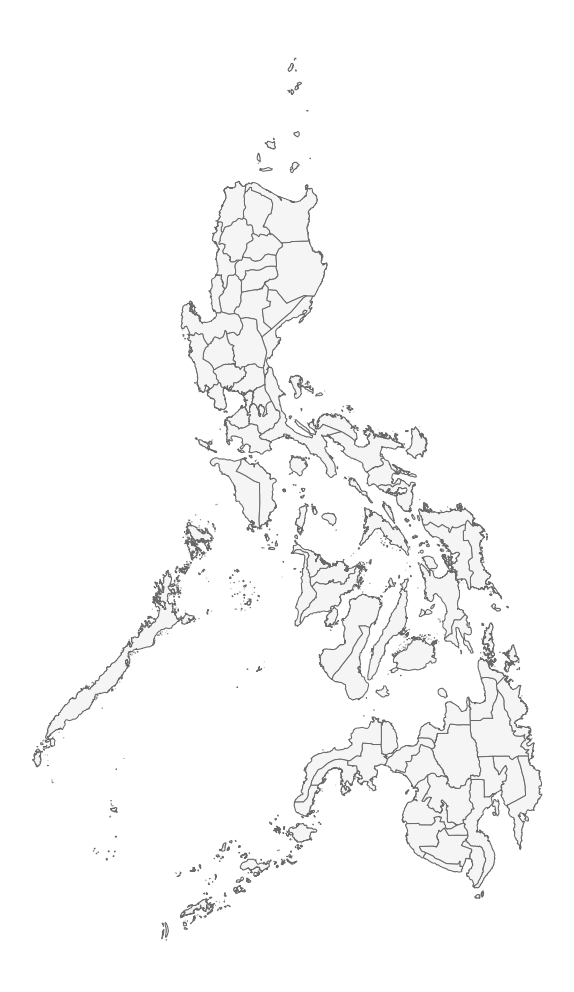

In [ ]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [ ]:
taxi = gpd.read_file(os.getenv('DSDATA') + '/taxi_zones/taxi_zones.shp')
taxi.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

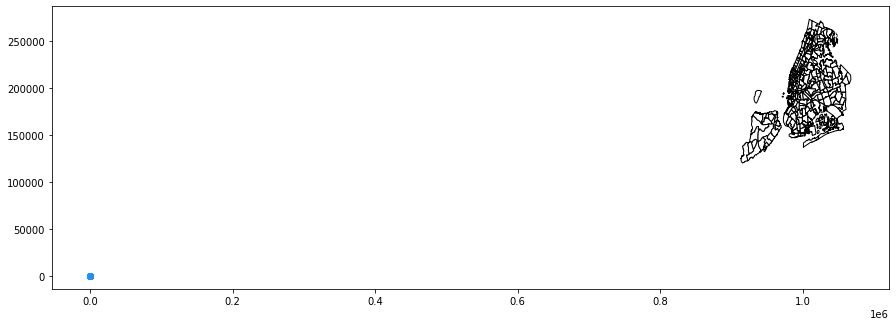

In [ ]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);

In [ ]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

Taxizones CRS epsg:2263
Citi Bike CRS +init=epsg:4326 +type=crs


In [ ]:
# First option is to pass a dictionary like how we initialized the citibike dataframe - this is the CRS
citi_gdf = citi_gdf.to_crs({'init': 'epsg:2263'})

# Another is to simply pass the code for the epsg through the epsg parameter
#citi_gdf = citi_gdf.to_crs(epsg=2263)

/Users/brianesamson/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


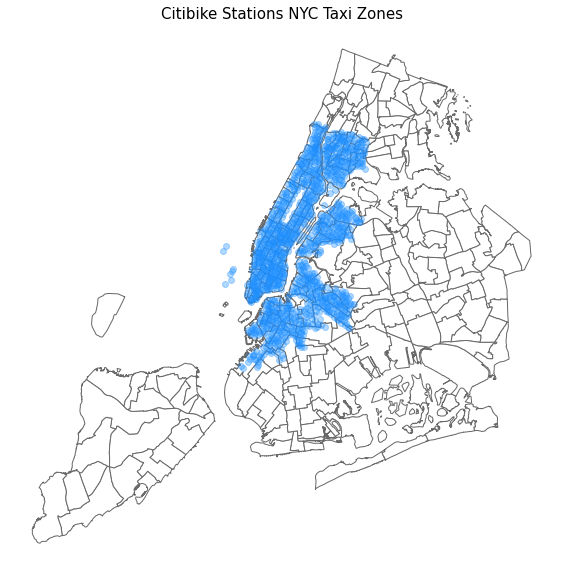

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations NYC Taxi Zones', fontsize=15)
ax.axis('off');

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [ ]:
# Read in the shapefile from the download
world = gpd.read_file(os.getenv('DSDATA') + '/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [ ]:
population = pd.read_csv(os.getenv('DSDATA') + '/API_SP.POP.TOTL_DS2_en_csv_v2_2252106/API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv',
                         skiprows=3)
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0


In [ ]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Merge the two dataframes
# Here I used LEFT JOIN first to be able to get all the country shapes
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,"Population, total",SP.POP.TOTL,87751068.0,90098394.0,92518377.0,...,241834215.0,245116206.0,248452413.0,251806402.0,255129004.0,258383256.0,261554226.0,264645886.0,267663435.0,270625568.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,"Population, total",SP.POP.TOTL,8156347.0,8417824.0,8692342.0,...,28208035.0,28650955.0,29068159.0,29468872.0,29866559.0,30270962.0,30684804.0,31105028.0,31528585.0,31949777.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,"Population, total",SP.POP.TOTL,8132990.0,8303811.0,8476897.0,...,17062536.0,17233576.0,17400347.0,17571507.0,17758959.0,17969353.0,18209068.0,18470439.0,18729160.0,18952038.0
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,BOL,"Population, total",SP.POP.TOTL,3656955.0,3728964.0,3802990.0,...,10048590.0,10212954.0,10377676.0,10542376.0,10706517.0,10869730.0,11031813.0,11192854.0,11353142.0,11513100.0
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,"Population, total",SP.POP.TOTL,10155015.0,10446620.0,10749466.0,...,29027674.0,29264318.0,29506788.0,29773987.0,30090359.0,30470734.0,30926032.0,31444297.0,31989256.0,32510453.0


In [ ]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
250,Macao S.A.R,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...","Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,167791.0,170462.0,176183.0,...,538219.0,550832.0,564039.0,577372.0,590208.0,602085.0,612836.0,622585.0,631636.0,640445.0
251,Ashmore and Cartier Islands,ATC,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Serranilla Bank,SER,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(-197.99999999999991, 198.0, -62.89613446679989, 90.61173089680007)

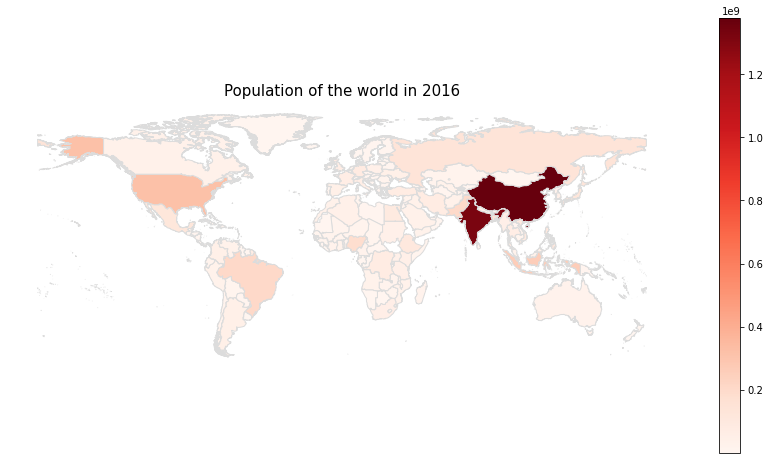

In [ ]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15);
ax.axis(False)

In [ ]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

(209, 67)

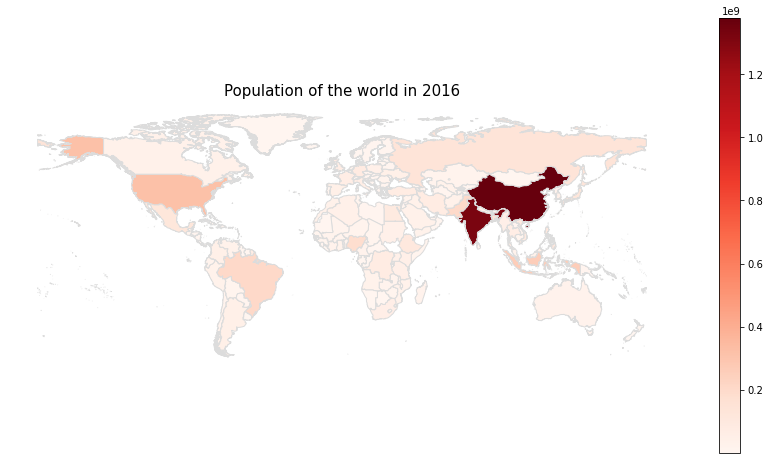

In [ ]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15)
ax.axis('off');

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [ ]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersection'
    Binary predicate, one of {'intersects', 'contains', 'within'}.
    See http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates.
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, default 'right'
    Suffix to apply to overlapping column names (right GeoDataFrame).
File:      /anaconda3/envs/datasci/lib/python3.7/site-packages/geopandas/tools/s

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [ ]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
stations_within.head()

,end station longitude,end station latitude,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,-73.990050,40.77237,POINT (987005.949 220672.168),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
60,-73.989187,40.77516,POINT (987244.869 221688.517),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
103,-73.982886,40.77748,POINT (988989.886 222534.387),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
488,-73.982886,40.77748,POINT (988989.886 222534.387),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
651,-73.990050,40.77237,POINT (987005.949 220672.168),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan


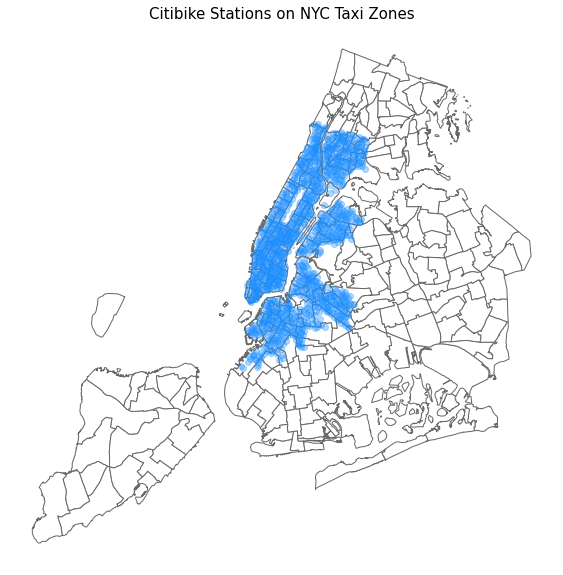

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
stations_within.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [ ]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, op='contains')
zones_with_stations.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,end station longitude,end station latitude
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",112567,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",174897,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",613877,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",342080,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",442950,-73.976687,40.722281


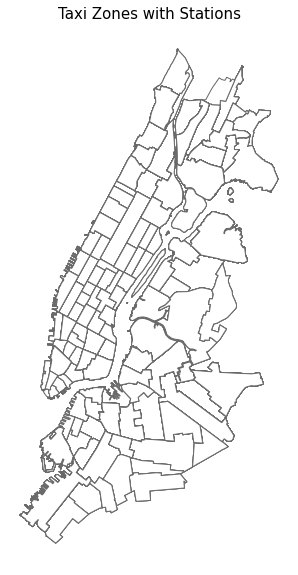

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [ ]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


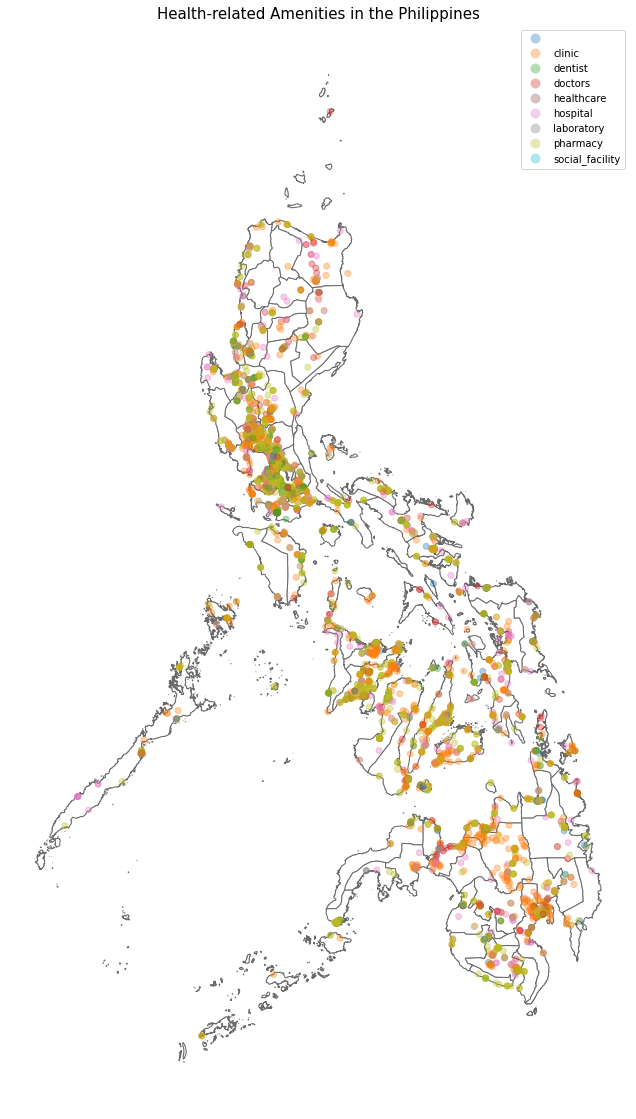

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [ ]:
healthsites.describe(include=np.object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [ ]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

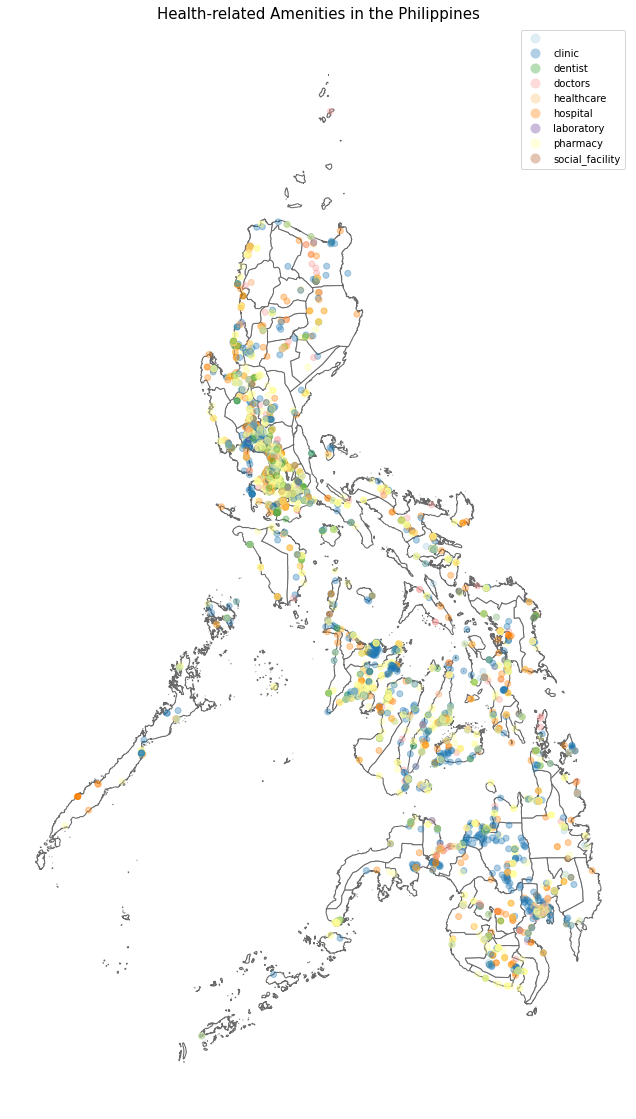

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

<AxesSubplot:>

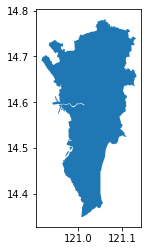

In [ ]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

###Metro Manila


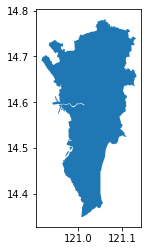

In [16]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

In [19]:
health_aminity= healthsites.groupby(["amenity"])['osm_id'].count()
health_aminity

amenity
                    393
clinic             2673
dentist             698
doctors             441
healthcare            1
hospital           2085
laboratory           33
pharmacy           4078
social_facility       3
Name: osm_id, dtype: int64

###Health Amenities within Metro Manila

In [20]:
health = gpd.sjoin(healthsites, mm, op='within')
health

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,,,,6c702af37c4a49d89dac127cc8a229f6,,,,,,,1.0,,2016-08-22T18:10:30,73-G,,,NYTheraspine,,FortuneSolace,,,,,,,None,None,POINT (121.03133 14.63151),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
15,796284976,way,9.0,,dentist,,,,,84795442.0,,,,893a1a5f33244c50a96e9a8bd5d255e5,,,,,,,2.0,,2020-05-07T02:47:29,,,,,,GraniteBender,,,,,dentist,,None,None,"POLYGON ((121.05898 14.73862, 121.05904 14.738...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,,,,93e2f36b9f3b4447a6a5a3dfcdc9bc98,,,,,,,2.0,,2013-10-11T14:32:42,,,Pasig,Mercury Drug Store,,Rally,,,,,,,None,None,POINT (121.08552 14.59049),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,,,,95dbaf6e0cfb4583a51716cbfb0c85ff,,,,,,,1.0,,2020-04-19T04:14:42,,,,The Generics Pharmacy,,Marah Pajutan,,,,,,,None,None,POINT (121.06715 14.70000),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10380,1750310921,node,15.0,,pharmacy,,Legazpi,,,56301439.0,,,,cb93ff8381e447588999a8f9c417e8f9,,,,,,,4.0,,2018-02-12T18:03:19,,,Makati,Mercury Drug,,seav,,,,,,,None,None,POINT (121.02057 14.55356),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
10391,4577600290,node,9.0,,dentist,,,,,44733607.0,,,,3f82e423edb04948a2720754e40021d8,,,,,,,1.0,,2016-12-28T15:22:32,,,,Catalig Dental Clinic,,Julius Catalig II,,,,,,,None,None,POINT (120.98441 14.61681),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
10397,23378979,way,25.0,,hospital,,Centennial Lane,,,82610764.0,,,,6267a392dda944ea83966d980ff43081,,,,,,,7.0,yes,2020-03-25T12:04:31,,1781,Muntinlupa,Ospital ng Muntinlupa,,FNorada,,,,,hospital,,None,None,"POLYGON ((121.04362 14.41403, 121.04384 14.414...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
10400,273428408,way,9.0,,clinic,,,,,55569745.0,,,,bfdacdef77e54a5eb505c27f4f1896ea,,,,,,,2.0,,2018-01-19T06:47:35,,,,Vitalez Health Center,,GOwin,,,,,,,None,None,"POLYGON ((121.00605 14.50795, 121.00607 14.508...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [21]:
mm_other= health[health.amenity=='']
mm_other.osm_id.count()

160

###Plot of all health amenities in Metro Manila

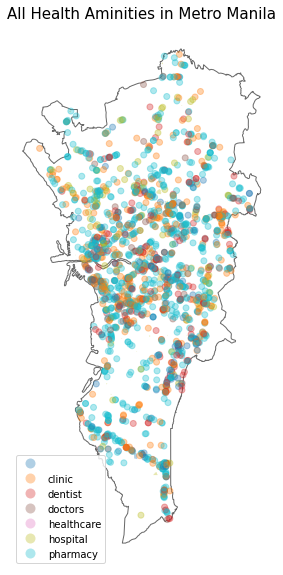

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
health.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('All Health Amenities in Metro Manila', fontsize=15)
ax.axis('off');

###Classifying the health amenities

In [24]:
mm_other= health[health.amenity=='']
mmclinic= health[health.amenity=='clinic']
mmdentist= health[health.amenity=='dentist']
mmdoctor= health[health.amenity=='doctors']
mmhealthcare= health[health.amenity=='healthcare']
mmhospital= health[health.amenity=='hospital']
mmpharmacy= health[health.amenity=='pharmacy']


Number of misc. health amenities in Metro Manila: 160


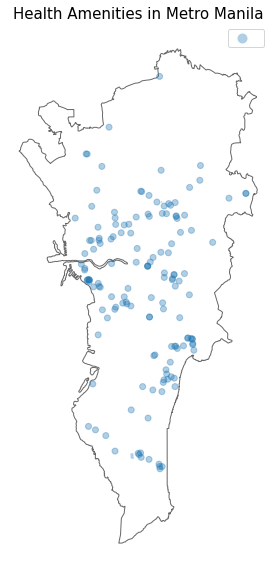

In [32]:
print("Number of misc. health amenities in Metro Manila:", mm_other.osm_id.count()) 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mm_other.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health Amenities in Metro Manila', fontsize=15)
ax.axis('off');

Number of clinics in Metro Manila: 532


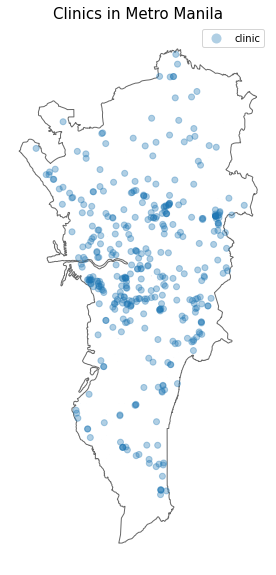

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot(ax =ax,color='white', edgecolor='dimgray')
mmclinic.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of clinics in Metro Manila:", mmclinic.osm_id.count()) 

Number of Dentists in Metro Manila: 228


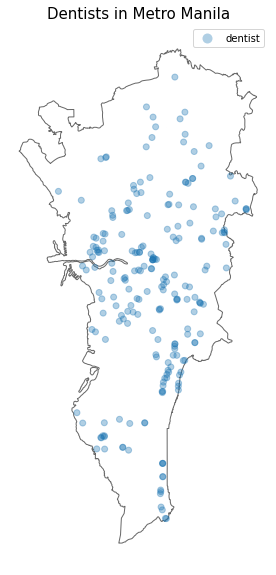

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mmdentist.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of dentists in Metro Manila:", mmdentist.osm_id.count()) 

Number of doctors in Metro Manila: 53


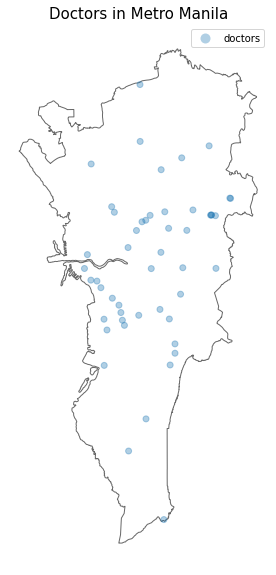

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mmdoctor.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of doctors in Metro Manila:", mmdoctor.osm_id.count()) 

Number of healthcare centers in Metro Manila: 1


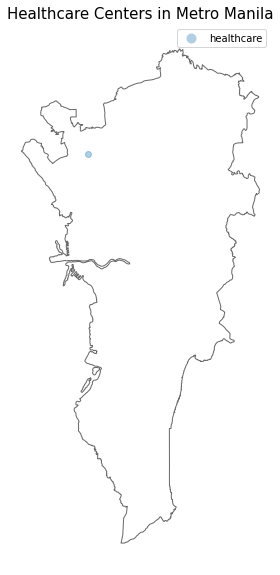

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mmhealthcare.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Healthcare Centers in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of healthcare centers in Metro Manila:", mmhealthcare.osm_id.count()) 

Number of hospitals in Metro Manila: 286


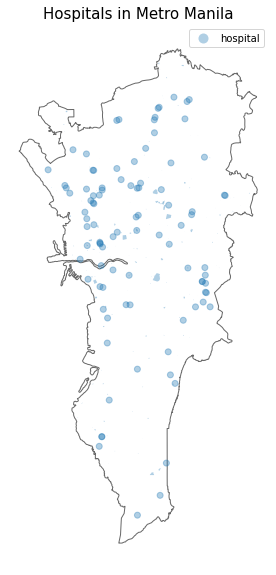

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mmhospital.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospitals in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of hospitals in Metro Manila:", mmhospital.osm_id.count()) 

Number of pharmacies in Metro Manila: 957


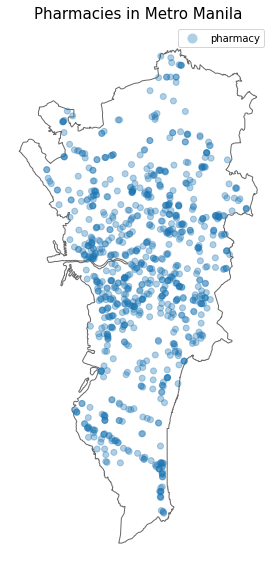

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mm.plot( ax =ax,color='white', edgecolor='dimgray')
mmpharmacy.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');
print("Number of pharmacies in Metro Manila:", mmpharmacy.osm_id.count()) 

###Batangas
I only know of family members in Metro Manila and not other provinces, so I just chose a random one


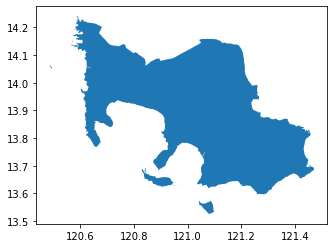

In [33]:
batangas = ph[ph.NAME_1=="Batangas"]
batangas.plot()

In [34]:
healthbatangas = gpd.sjoin(healthsites, batangas, op='within')
healthbatangas

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
235,7021235889,node,15.0,,pharmacy,,,,,77751741.0,,,,01eef05cd210410e82f457317ff6b884,,,,,,,1.0,,2019-11-30T07:29:24,,,,The Generics Pharmacy,,Zeirous,,,,yes,pharmacy,,None,None,POINT (120.92203 13.87981),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
293,397032796,way,15.0,,hospital,,P.Munoz,,,69438655.0,,,,0b0e9c2b24eb4455aeb87c10985066c1,,,,,,,2.0,,2019-04-22T02:52:02,,4201,,Bejasa Hospital,,GOwin,,,,,,,None,None,"POLYGON ((121.00724 13.79340, 121.00741 13.793...",11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
333,3654491477,node,12.0,,pharmacy,,,,,92608117.0,,,,f6e76e77a17e485ab6c4b0258f253bdd,,,,,,,5.0,,2020-10-16T23:44:15,,,,TGP,,TagaSanPedroAko,,,,,pharmacy,,None,None,POINT (121.05621 13.75606),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
412,5310686228,node,9.0,,pharmacy,,,,,76835421.0,,,,d9183ed7cf254d85bc21ed743757c920,,,,,,,3.0,,2019-11-09T02:46:05,,,,Joeanne Pharmacy and Medical Supplies,,TagaSanPedroAko,,,,,,,None,None,POINT (121.07066 13.79768),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
429,611995238,node,9.0,,hospital,,,,,3600786.0,,,,2c2cf9a1ebb44bbcb89ae9ba882fbac8,,,,,,,1.0,,2010-01-12T04:10:47,,,,Fernando Air Base Hospital,,smarukot,,,,,,,None,None,POINT (121.12710 13.94692),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,5553359883,node,9.0,,dentist,,,,,58099179.0,,,,f530f017f48e48d39b8bcdf6dfe81252,,,,,,,2.0,,2018-04-14T22:17:51,,,,Mendoza Dental,,TagaSanPedroAko,,,,,,,None,None,POINT (121.21078 13.64774),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
10369,3654491461,node,12.0,,dentist,,,,,92607087.0,,,,b4731855f5ae401c98381a2fadb360c8,,Mo-Su 08:30-18:30,,,,,2.0,,2020-10-16T22:34:26,,,,Dental Bay,,TagaSanPedroAko,,,,,,,None,None,POINT (121.05743 13.75536),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
10372,263445335,way,18.0,,pharmacy,,Jose P. Laurel Highway,,,43344127.0,,,,5857855b7cd44855b6ae8d95bd04fa44,,,,,,,3.0,,2016-11-02T07:12:54,,4217,Lipa,Mercury Drug,,jobrianne,,,,,,,None,None,"POLYGON ((121.16467 13.95469, 121.16469 13.954...",11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT
10381,8014716669,node,9.0,,dentist,,,,,92607087.0,,,,605335b1a0434add8aeb867642c474a8,,,,,,,1.0,,2020-10-16T22:34:26,,,,Dr. Paulo Rey A. Bahala,,TagaSanPedroAko,,,,,,,None,None,POINT (121.05606 13.75490),11,PHL,Philippines,PHL.12_1,Batangas,None,None,Lalawigan|Probinsya,Province,410,PH.BT


###Checking the plot of all health amenities in Batangas

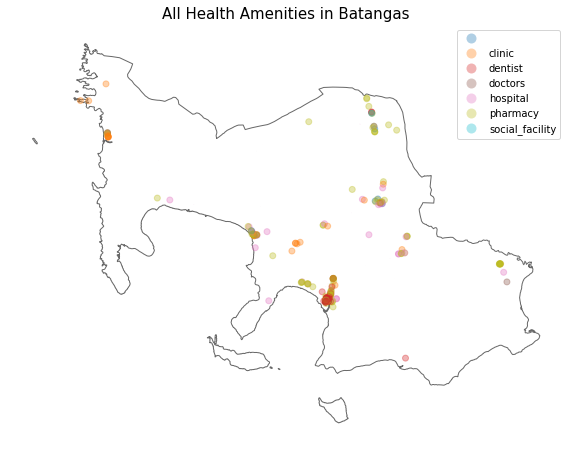

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot(ax =ax,color='white', edgecolor='dimgray')
healthbatangas.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('All Health Amenities in Batangas', fontsize=15)
ax.axis('off');

###Classifying the health amenities in Batangas

In [38]:
batangas_other= healthbatangas[healthbatangas.amenity=='']
batangasclinic= healthbatangas[healthbatangas.amenity=='clinic']
batangasdentist= healthbatangas[healthbatangas.amenity=='dentist']
batangasdoctor= healthbatangas[healthbatangas.amenity=='doctors']
batangashospital= healthbatangas[healthbatangas.amenity=='hospital']
batangaspharmacy= healthbatangas[healthbatangas.amenity=='pharmacy']

Number of health amenities in Batangas: 17


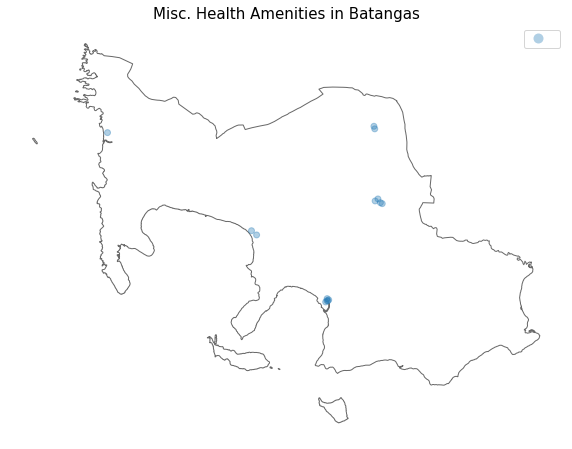

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangas_other.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Misc. Health Amenities in Batangas', fontsize=15)
ax.axis('off');
print("Number of health amenities in Batangas:", batangas_other.osm_id.count()) 

Number of clinics in Batangas: 55


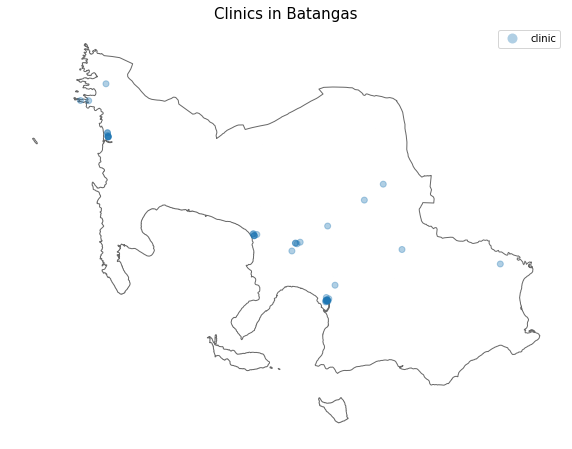

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangasclinic.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinics in Batangas', fontsize=15)
ax.axis('off');
print("Number of clinics in Batangas:", batangasclinic.osm_id.count()) 

Number of dentists in Batangas: 67


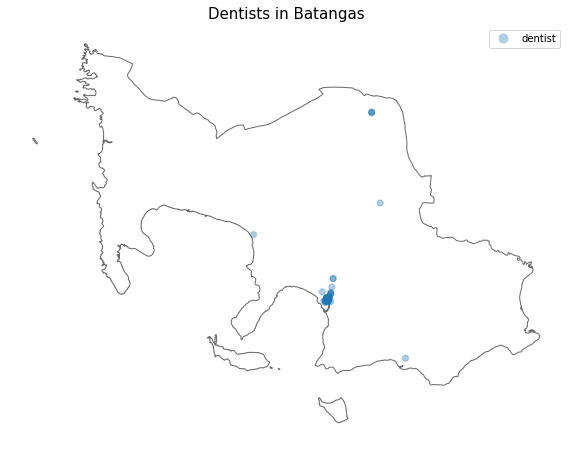

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangasdentist.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentists in Batangas', fontsize=15)
ax.axis('off');
print("Number of dentists in Batangas:", batangasdentist.osm_id.count()) 

Number of doctors in Batangas: 35


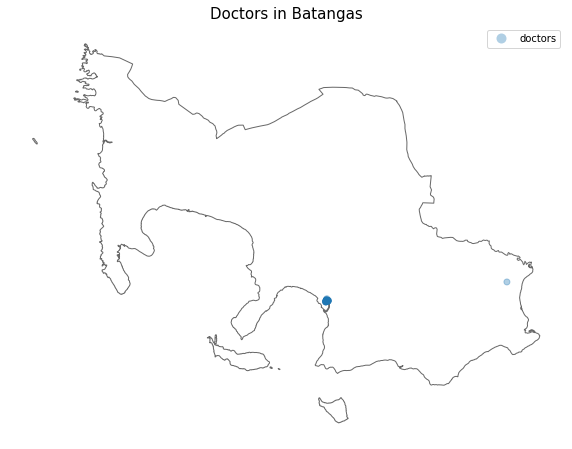

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangasdoctor.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctors in Batangas', fontsize=15)
ax.axis('off');
print("Number of doctors in Batangas:", batangasdoctor.osm_id.count()) 

Number of hospitals in Batangas: 87


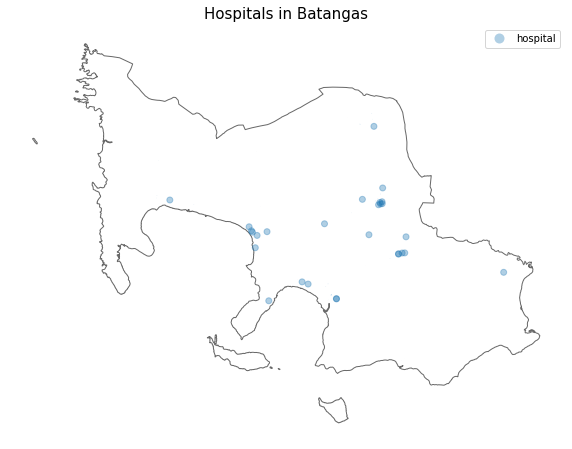

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangashospital.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospitals in Batangas', fontsize=15)
ax.axis('off');
print("Number of hospitals in Batangas:", batangashospital.osm_id.count()) 

Number of pharmacies in Batangas: 114


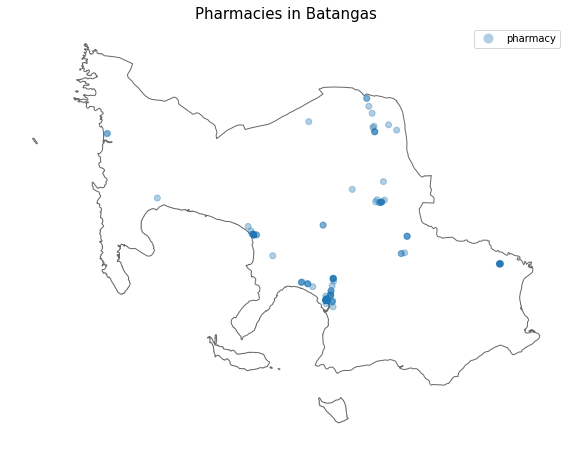

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
batangas.plot( ax =ax,color='white', edgecolor='dimgray')
batangaspharmacy.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Batangas', fontsize=15)
ax.axis('off');
print("Number of pharmacies in Batangas:", batangaspharmacy.osm_id.count()) 

All plots

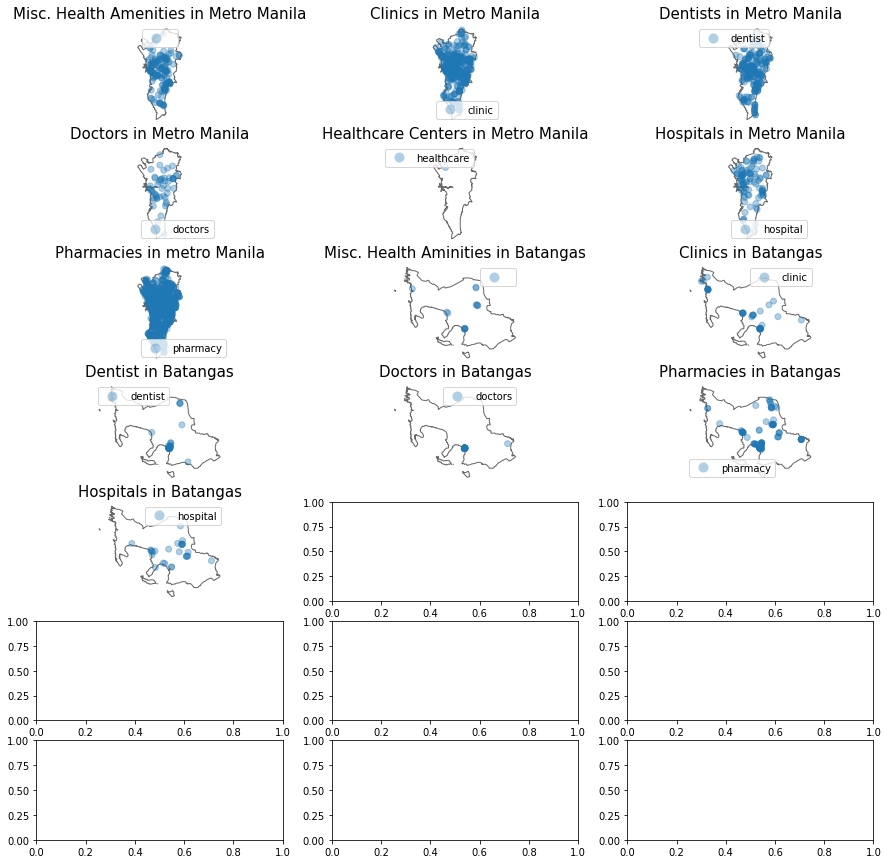

In [45]:
fig, axs = plt.subplots(7, 3, figsize=(15,15))


mm.plot( ax =axs[0,0],color='white', edgecolor='dimgray')
mm_other.plot(ax=axs[0, 0], column="amenity", alpha=0.35, legend=True)
axs[0, 0].set_title('Misc. Health Amenities in Metro Manila', fontsize=15)
axs[0,0].axis('off');

mm.plot( ax =axs[0,1],color='white', edgecolor='dimgray')
mmclinic.plot(ax=axs[0, 1], column="amenity", alpha=0.35, legend=True)
axs[0,1].set_title('Clinics in Metro Manila', fontsize=15)
axs[0,1].axis('off');

mm.plot( ax =axs[0, 2],color='white', edgecolor='dimgray')
mmdentist.plot(ax=axs[0, 2], column="amenity", alpha=0.35, legend=True)
axs[0,2].set_title('Dentists in Metro Manila', fontsize=15)
axs[0,2].axis('off');

mm.plot( ax =axs[1,0],color='white', edgecolor='dimgray')
mmdoctor.plot(ax=axs[1, 0], column="amenity", alpha=0.35, legend=True)
axs[1,0].set_title('Doctors in Metro Manila', fontsize=15)
axs[1,0].axis('off');

mm.plot( ax =axs[1,1],color='white', edgecolor='dimgray')
mmhealthcare.plot(ax=axs[1, 1], column="amenity", alpha=0.35, legend=True)
axs[1,1].set_title('Healthcare Centers in Metro Manila', fontsize=15)
axs[1,1].axis('off');

mm.plot( ax =axs[1, 2],color='white', edgecolor='dimgray')
mmhospital.plot(ax=axs[1, 2], column="amenity", alpha=0.35, legend=True)
axs[1, 2].set_title('Hospitals in Metro Manila', fontsize=15)
axs[1, 2].axis('off');

mm.plot( ax =axs[2,0],color='white', edgecolor='dimgray')
mmpharmacy.plot(ax=axs[2, 0], column="amenity", alpha=0.35, legend=True)
axs[2, 0].set_title('Pharmacies in metro Manila', fontsize=15)
axs[2, 0].axis('off');

batangas.plot( ax =axs[2, 1],color='white', edgecolor='dimgray')
batangas_other.plot(ax=axs[2, 1], column="amenity", alpha=0.35, legend=True)
axs[2, 1].set_title('Misc. Health Aminities in Batangas', fontsize=15)
axs[2, 1].axis('off');

batangas.plot( ax =axs[2, 2],color='white', edgecolor='dimgray')
batangasclinic.plot(ax=axs[2, 2], column="amenity", alpha=0.35, legend=True)
axs[2, 2].set_title('Clinics in Batangas', fontsize=15)
axs[2, 2].axis('off');

batangas.plot( ax =axs[3, 0],color='white', edgecolor='dimgray')
batangasdentist.plot(ax=axs[3, 0], column="amenity", alpha=0.35, legend=True)
axs[3, 0].set_title('Dentist in Batangas', fontsize=15)
axs[3, 0].axis('off');

batangas.plot( ax =axs[3, 1],color='white', edgecolor='dimgray')
batangasdoctor.plot(ax=axs[3, 1], column="amenity", alpha=0.35, legend=True)
axs[3, 1].set_title('Doctors in Batangas', fontsize=15)
axs[3, 1].axis('off');

batangas.plot( ax =axs[3, 2],color='white', edgecolor='dimgray')
batangaspharmacy.plot(ax=axs[3, 2], column="amenity", alpha=0.35, legend=True)
axs[3, 2].set_title('Pharmacies in Batangas', fontsize=15)
axs[3, 2].axis('off');

batangas.plot( ax =axs[4, 0],color='white', edgecolor='dimgray')
batangashospital.plot(ax=axs[4, 0], column="amenity", alpha=0.35, legend=True)
axs[4, 0].set_title('Hospitals in Batangas', fontsize=15)
axs[4, 0].axis('off');
